<a href="https://colab.research.google.com/github/BweepBwop/DSP/blob/main/DFT_Lab_1_Urbano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Discrete Fourier Transform in Image Processing**

**Objective**

To understand and apply the Discrete Fourier Transform (DFT) in image processing by performing various operations such as noise reduction, edge detection, and image compression.

# **Noise Reduction Using the DFT**

1.   Load a grayscale image (you can use any image, such as a simple photograph or a document scan).
2.   Add random noise to the image.
3.   Compute the DFT of the noisy image using **numpy.fft.fft2** and shift the zero-frequency component to the center using **numpy.fft.fftshift**.
4.   Design a low-pass filter to remove high-frequency components (where noise typically resides) and apply it to the DFT.
5.   Perform the inverse DFT to reconstruct the denoised image.


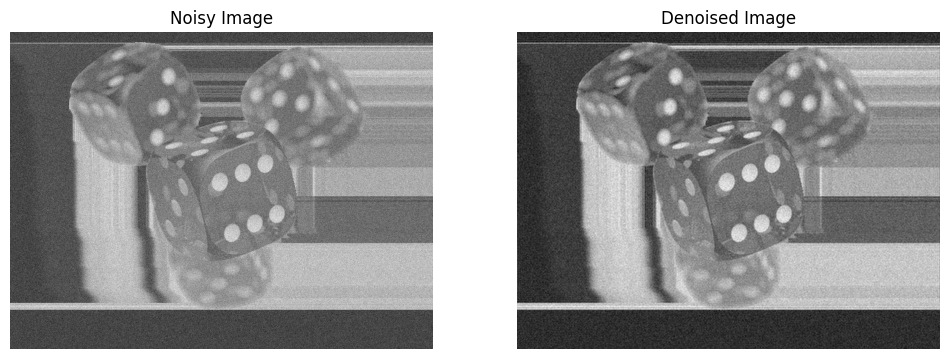

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests

url = 'https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png'
image = cv2.imdecode(np.asarray(bytearray(requests.get(url).content), dtype=np.uint8), cv2.IMREAD_GRAYSCALE)

noisy_image = image + np.random.normal(0, 25, image.shape)

dft_shifted = np.fft.fftshift(np.fft.fft2(noisy_image))
rows, cols = noisy_image.shape
mask = np.zeros((rows, cols), np.uint8)
mask[rows // 4:3 * rows // 4, cols // 4:3 * cols // 4] = 1

denoised_image = np.fft.ifft2(np.fft.ifftshift(dft_shifted * mask)).real

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')

plt.show()

**Questions:**

1. How does the DFT change when noise is added to the image?

We notice when an image is "Noisy" there is an increase in frequency which actually corresponds to the noise. With the noise's presence, this distorts the original frequency of the image, this makes it harder for us to distunguish the actual image we uploaded, and the noise applied one.


2. How effective was the low-pass filter in reducing noise?

It was quite effective. It led to the reduction of the  high-frequency components introduced by the noise, thus, outputing a denoised image on the right. Additionally, it helped preserve low frequencies by allowing low-frequency components to pass, the filter applied helps in retainaining the core features of the image while minimizing the noise of the image. Notice that the denoised image is more clear, and less noisy.


3. Try adjusting the cutoff frequency of the low-pass filter. What effect does this have?

This helps reduce the high-frequency noise amounts in the image, and potentially refines it as well. The output image is smoother. There is a higher cutoff frequency, this allows more high-frequency components to pass through, which can retain more details but may also let some noise remain. Denoising a picture requires an equilibrium between preserving clarity and reducing noise, thus choosing the appropriate cutoff frequency is essential. The quality of the denoised image can be greatly affected by adjusting the cutoff frequency, and it is sometimes required to experiment in order to get the desired effect.

*your answers goes here!*

# **Edge Detection Using the DFT**

1. Load a grayscale image.

2. Compute the DFT of the image.

3. Design a high-pass filter to retain high-frequency components, which often correspond to edges in the image.

4. Apply the high-pass filter in the frequency domain and compute the inverse DFT.

5. Display the resulting edge-detected image.



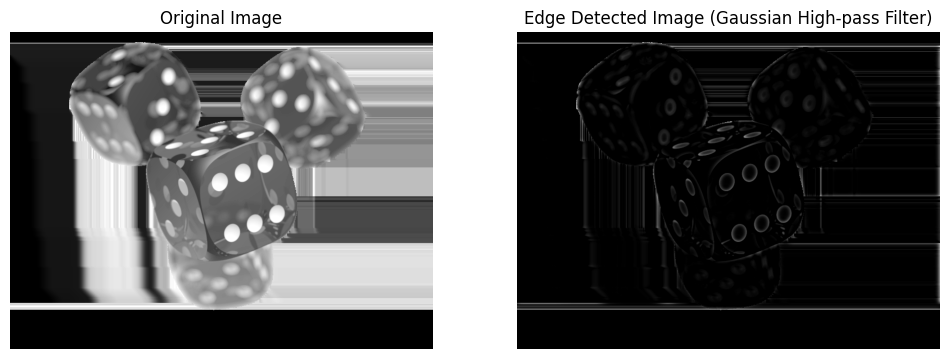

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests

url = 'https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png'
response = requests.get(url)

dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
x = np.arange(-ccol, ccol)
y = np.arange(-crow, crow)
X, Y = np.meshgrid(x, y)
sigma = 30
gaussian_low_pass = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
high_pass_filter = 1 - gaussian_low_pass

dft_filtered = dft_shifted * high_pass_filter

idft_shifted = np.fft.ifftshift(dft_filtered)
edge_image = np.fft.ifft2(idft_shifted).real

edge_image = np.clip(edge_image, 0, 255)
edge_image = edge_image.astype(np.uint8)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Detected Image (Gaussian High-pass Filter)')
plt.imshow(edge_image, cmap='gray')
plt.axis('off')

plt.show()

**Questions:**

1. Why does the high-pass filter emphasize edges?

The reason that a high-pass can filter can emphasize the edges is that it decreases low-frequency components of the given images while it permits elements that are high-frequency to pass through. Accordingly, in the context of image processing, high-frequency components correlate to quick changes in intensity (such as edges, noise, and small features), and low-frequency components belong to slower variations of intensities, which might be gradual or uniform areas. It is also important to note that the edges in the image are because of abrupt changes in pixel intensity (Giving the thicker border).Applying a high-pass filter efficiently suppresses the smoother regions while emphasizing these quick shifts. As a result, edges become more noticeable and the image emphasizes the shapes and borders of items. An image is represented in the frequency domain of the Discrete Fourier Transform (DFT), which is a sum of sinusoidal functions of different frequencies. The higher frequency for edges are retained while the lower frequency components, some smooth regions, are removed using a high-pass filter.


2. Try different cutoff frequencies in the high-pass filter. What impact do they have on the image?


Cutoff frequency in a high-pass filter determines which frequency components are retained. When we adjust the cutoff frequency, you can control the extent to which low-frequency information is filtered out. A low cutoff frequency, for example, will let more low-frequency components past the filter. As a consequence, less edge effects will be applied to the final image, which will preserve more of the details and smooth regions. The picture can seem less sharp and more softer in the final output. On the other hand, an adequate cutoff frequency will balance the need to emphasize edges and preserve some low-frequency information. While maintaining certain details in the smoother regions, the final image will have a better definition of the edges. Last but not least, the filter will eliminate the majority of low-frequency components at high cutoff frequencies (such as a bigger square in the middle of the frequency spectrum). As a result, the image will mostly show high-frequency features like noise and edges. It could seem like a lot sharper image.

*your answers goes here!*

# **Image Compression Using the DFT**
1. Load a grayscale image.

2. Compute the DFT of the image and shift the zero-frequency component to the center.

3. Retain only the central low-frequency components (discarding high frequencies) to compress the image.

4. Perform the inverse DFT to reconstruct a compressed version of the image.



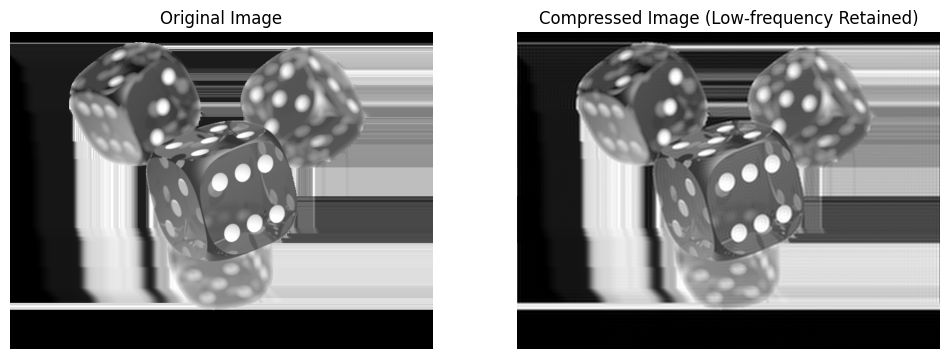

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests

# Load the image from the URL
url = 'https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png'
response = requests.get(url)

dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

mask = np.zeros((rows, cols), np.uint8)
mask[crow - int(rows * 0.15):crow + int(rows * 0.15),
     ccol - int(cols * 0.15):ccol + int(cols * 0.15)] = 1

dft_compressed = dft_shifted * mask
idft_shifted = np.fft.ifftshift(dft_compressed)
compressed_image = np.fft.ifft2(idft_shifted).real

compressed_image = np.clip(compressed_image, 0, 255)
compressed_image = compressed_image.astype(np.uint8)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Compressed Image (Low-frequency Retained)')
plt.imshow(compressed_image, cmap='gray')
plt.axis('off')

plt.show()

**Questions:**

1. How does retaining only low-frequency components affect image quality?

Retaining low-frequency components produces a smoother-looking image output since they correspond to the image's smooth intensity changes. Observe that the original details have also been lost. You lose the image's "High Quality" feel if you simply keep the low-frequency elements. Because elements like borders and textures are lost, the image may look blurry or overly simplified. Compression artifacts may appear in the final image when low-frequency components are kept while high-frequency components are eliminated, particularly if the compression is extreme. In regions with smooth gradients, these features may appear as banding.


2. Try varying the amount of data retained in the frequency domain. What impact does this have on compression and quality?

When there are more low-frequencies retained, the image will appear to have a smoother interface. This means that it would still keep the essential features making it still visually coherent. If compression ratio is lower then it means that some of its data is still retained. However, this means that the file size will be larger, since it has more information still preserved in the image. If fewer low-frequency components are retained, the image may become sharper similar to a heavily contrasted photo, but it can also introduce noise which is a downside. The loss of important structural information of an image can lead to a degraded visual quality (as seen in the photo it looks like it lost its original HD quality), with more visible high-frequency noise. Let's say that we want the image to consume fewer space in the memory of our phone, the file size may be smaller but the quality of the image will be poor, leading to a less recognizable image.

*your answers goes here!*

# **Summary Questions**


1. What are the advantages and disadvantages of using the DFT for noise reduction, edge detection, and image compression?
2. How does the DFT help analyze the frequency content of an image?


The Discrete Fourier Transform (DFT) gives us a lot advantages and disadvantages for image processing tehcniques using just python; noise reduction, edge detection, and image compression are possible. With the knowledge of DFT, we can understand how to effectively noise reduce an image by separating high-frequency noise from low-frequency signal components, although aggressive filtering requires significant computational resources, it is still managable.


In edge detection, DFT draws attention to high-frequency elements that match edges, but it may also cause contextual information to be lost. Lastly, DFT effectively portrays images by compressing information at low frequencies. This allows for large compression ratios, but at the price of losing detail and complexity of reconstruction, it also helps us by reducing the size of the image. DFT helps analyze the frequency content of an image by transforming it from the spatial domain into the frequency domain, which allows the image to be divided into its individual frequencies. With the phase revealing the frequency's spatial location and the magnitude indicating its strength, each of the aforementioned frequencies has a pixel intensity pattern shift. Pixel transformation makes it possible to identify patterns and even textures in an image, which makes it easier to create filters that are specifically designed to enhance or suppress particular frequencies. It also helps to compress images efficiently by identifying the frequencies that contribute most to visual information.
